![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

# Face Mesh

Reference: [Face Mesh](https://google.github.io/mediapipe/solutions/face_mesh) mediapipe library.


## Library

In [ ]:
pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 24.0 MB/s eta 0:00:00


In [ ]:
import cv2
import mediapipe as mp
import numpy as np

## Testing Image

In [ ]:
!wget https://www.dropbox.com/s/p7atkv9ppu08pq1/GANface01.jpg

--2023-07-20 14:49:38--  https://www.dropbox.com/s/p7atkv9ppu08pq1/GANface01.jpg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/p7atkv9ppu08pq1/GANface01.jpg [following]
--2023-07-20 14:49:39--  https://www.dropbox.com/s/raw/p7atkv9ppu08pq1/GANface01.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb27c9af320e412df524b8def78.dl.dropboxusercontent.com/cd/0/inline/CAPryujegUw2o9MHlJfZTf9U2Ca3JHdDtwYjRlX5gC4vg32pNpN7d1YQTGWmaHk53aOMB_fAmVgqCsJbxDegu5fNLZ_QHwkmTqRR8h6-xJLn-vhvobk4L_BRoe_-VJ_OFMyeq2LaitNpAboaSpcRFr87bXojMbca_ELwLDM5IHAMbQ/file# [following]
--2023-07-20 14:49:39--  https://ucb27c9af320e412df524b8def78.dl.dropboxusercontent.com/cd/0/inline/CAPryujegUw2o9MHlJfZTf9U2Ca3JHdDtwYjRlX5gC4vg32pNpN7d1YQTGWmaHk53aOMB_fAmVgq

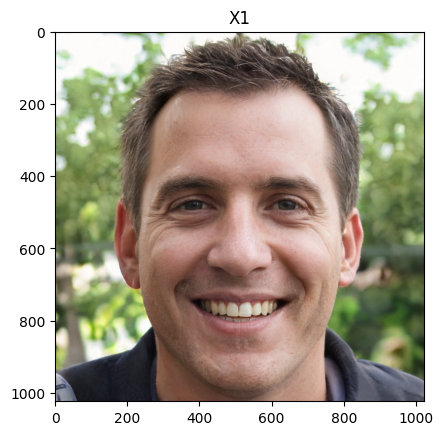

In [ ]:
import cv2
import matplotlib.pyplot as plt


X1 = cv2.imread('GANface01.jpg')
plt.imshow(cv2.cvtColor(X1, cv2.COLOR_BGR2RGB))
plt.title('X1')
plt.show()


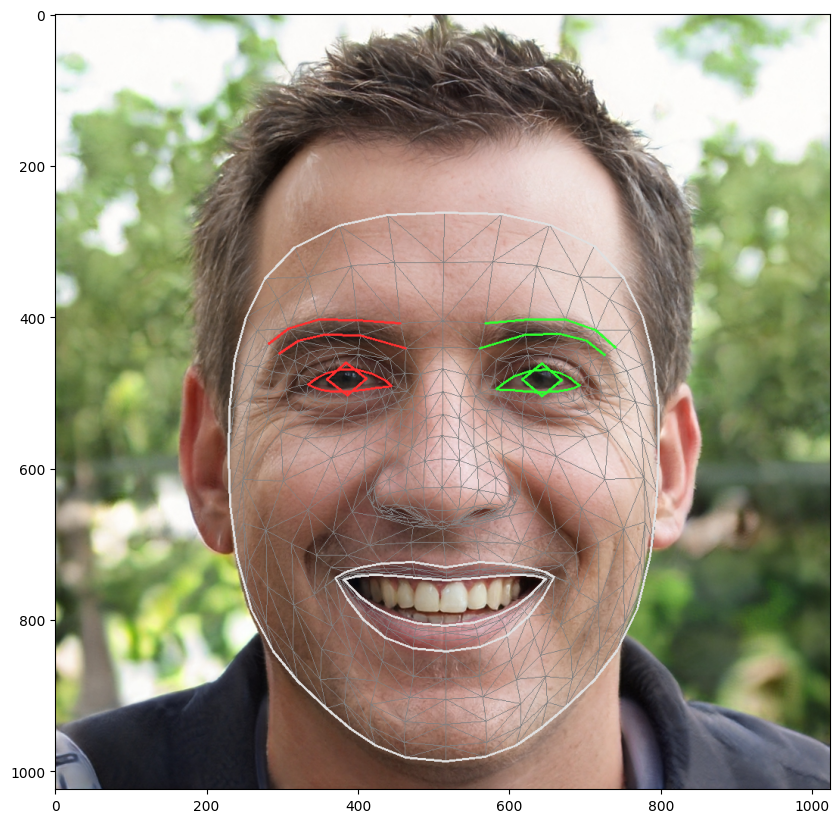

In [ ]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:

  ##### INPUT IMAGE HERE:
  image = X1
  ##### INPUT IMAGE HERE:

  # Convert the BGR image to RGB before processing.
  results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

  annotated_image = image.copy()
  #annotated_image = np.zeros(image.shape,np.ndarray)
  #plt.imshow(annotated_image)
  for face_landmarks in results.multi_face_landmarks:
    #print('face_landmarks:', face_landmarks)
    mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
    mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_contours_style())
    mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_iris_connections_style())

plt.figure(figsize=(10,15))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
!pip3 install mtcnn
!pip3 install opencv-contrib-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 8.8 MB/s eta 0:00:00


In [ ]:
from mtcnn.mtcnn import MTCNN
detector = MTCNN()

In [ ]:
X = X1

In [ ]:
face_locations = detector.detect_faces(X)

1/1 [==============================] - 0s 329ms/step


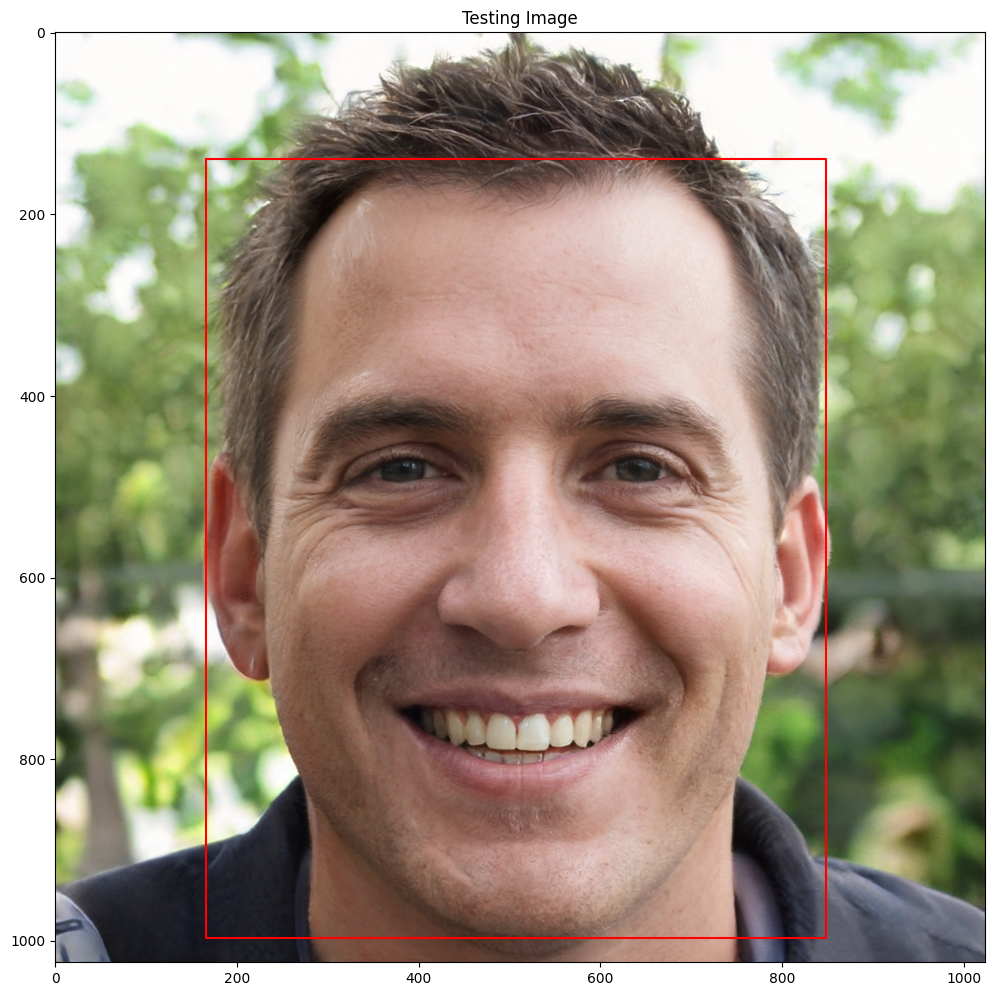

In [ ]:
plt.figure(figsize=(12,30))
plt.imshow(cv2.cvtColor(X, cv2.COLOR_BGR2RGB))
plt.title('Testing Image')
d = 50
n = len(face_locations)
for i in range(n):
  bb = face_locations[i]['box']
  x1 = bb[0]-d
  x2 = bb[0]+bb[2]+d
  y1 = bb[1]-d
  y2 = bb[1]+bb[3]+d
  x = [x1,x1,x2,x2,x1]
  y = [y1,y2,y2,y1,y1]
  plt.plot(x,y,c='red')

plt.show()
